<a href="https://colab.research.google.com/github/rmorenx/proyeccto/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carga el archivo csv en un dataframe
df = pd.read_csv("Drug_overdose.csv")

print(df.head())

                   INDICATOR                     PANEL  PANEL_NUM  \
0  Drug overdose death rates  All drug overdose deaths          0   
1  Drug overdose death rates  All drug overdose deaths          0   
2  Drug overdose death rates  All drug overdose deaths          0   
3  Drug overdose death rates  All drug overdose deaths          0   
4  Drug overdose death rates  All drug overdose deaths          0   

                                                UNIT  UNIT_NUM STUB_NAME  \
0  Deaths per 100,000 resident population, age-ad...         1     Total   
1  Deaths per 100,000 resident population, age-ad...         1     Total   
2  Deaths per 100,000 resident population, age-ad...         1     Total   
3  Deaths per 100,000 resident population, age-ad...         1     Total   
4  Deaths per 100,000 resident population, age-ad...         1     Total   

   STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
0              0  All persons             0.1  1999  

In [ ]:
print("\n Informacion del dataframe:      ")
print(df.STUB_LABEL == "sex and gender")


 Informacion del dataframe:      
0       False
1       False
2       False
3       False
4       False
        ...  
6223    False
6224    False
6225    False
6226    False
6227    False
Name: STUB_LABEL, Length: 6228, dtype: bool


In [ ]:
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())



Estadísticas descriptivas del DataFrame:
         PANEL_NUM     UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM         YEAR  \
count  6228.000000  6228.000000    6228.000000     6228.000000  6228.000000   
mean      2.500000     1.578035       3.028902        3.383006  2008.664740   
std       1.707962     0.493913       1.447036        1.526819     5.849512   
min       0.000000     1.000000       0.000000        0.100000  1999.000000   
25%       1.000000     1.000000       2.000000        2.100000  2004.000000   
50%       2.500000     2.000000       3.000000        3.220000  2009.000000   
75%       4.000000     2.000000       4.000000        4.600000  2014.000000   
max       5.000000     2.000000       5.000000        5.930000  2018.000000   

          YEAR_NUM      AGE_NUM     ESTIMATE  
count  6228.000000  6228.000000  5117.000000  
mean     10.664740     1.354913     4.743443  
std       5.849512     0.301459     6.424471  
min       1.000000     1.100000     0.000000  
25%       6

In [ ]:
df["STUB_LABEL"].value_counts()

STUB_LABEL
All persons                                                                  240
Female                                                                       240
Male                                                                         240
Male: Hispanic or Latino: All races                                          126
Female: Not Hispanic or Latino: American Indian or Alaska Native             126
Female: Not Hispanic or Latino: Black                                        126
Female: Not Hispanic or Latino: White                                        126
Male: Not Hispanic or Latino: American Indian or Alaska Native               126
Male: Not Hispanic or Latino: Black                                          126
Male: Not Hispanic or Latino: White                                          126
Female: Hispanic or Latino: All races                                        126
Female: Black or African American                                            126
Female: White    

In [ ]:
df["AGE"].value_counts()


AGE
All ages             2988
Under 15 years        360
15-24 years           360
25-34 years           360
35-44 years           360
45-54 years           360
55-64 years           360
65-74 years           360
75-84 years           360
85 years and over     360
Name: count, dtype: int64

In [ ]:
df["PANEL"].value_counts()

PANEL
All drug overdose deaths                                                         1038
Drug overdose deaths involving any opioid                                        1038
Drug overdose deaths involving natural and semisynthetic opioids                 1038
Drug overdose deaths involving methadone                                         1038
Drug overdose deaths involving other synthetic opioids (other than methadone)    1038
Drug overdose deaths involving heroin                                            1038
Name: count, dtype: int64

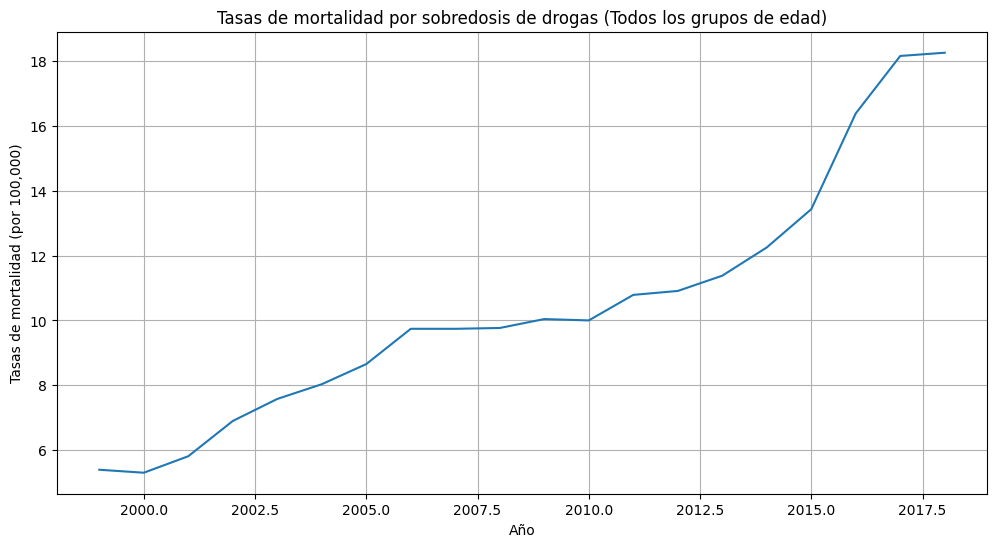

In [ ]:
# Filtrar datos para todos los grupos de edad y todos los tipos de sobredosis
df_all_ages = df[(df['AGE'] == 'All ages') & (df['PANEL'] == 'All drug overdose deaths')]
# Agrupar por año y calcular la media de las tasas de mortalidad
df_grouped = df_all_ages.groupby('YEAR')['ESTIMATE'].mean().reset_index()
# Crear la visualización
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['YEAR'], df_grouped['ESTIMATE'])
plt.title('Tasas de mortalidad por sobredosis de drogas (Todos los grupos de edad)')
plt.xlabel('Año')
plt.ylabel('Tasas de mortalidad (por 100,000)')
plt.grid(True)
plt.show()

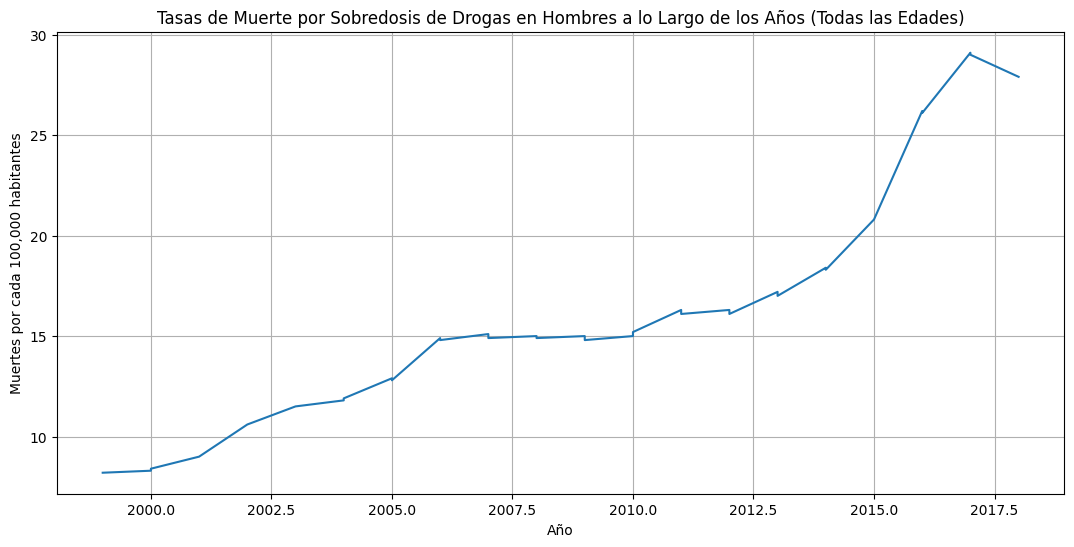

In [ ]:
# Filtrar los datos para incluir solo 'All drug overdose deaths', 'Total' y 'Male' para todas las edades
men_filtered_data = df[(df['AGE'] == 'All ages') &
                         (df['PANEL'] == 'All drug overdose deaths') &
                         (df['STUB_LABEL'] == 'Male')]

# Ordenar los datos por año en orden ascendente
men_filtered_data_sorted = men_filtered_data.sort_values(by='YEAR')

# Extraer las columnas relevantes para la visualización
men_years = men_filtered_data_sorted['YEAR']
men_death_rates = men_filtered_data_sorted['ESTIMATE']

# Generar la gráfica
plt.figure(figsize=(13, 6))
plt.plot(men_years, men_death_rates)
plt.title('Tasas de Muerte por Sobredosis de Drogas en Hombres a lo Largo de los Años (Todas las Edades)')
plt.xlabel('Año')
plt.ylabel('Muertes por cada 100,000 habitantes')
plt.grid(True)
plt.show()


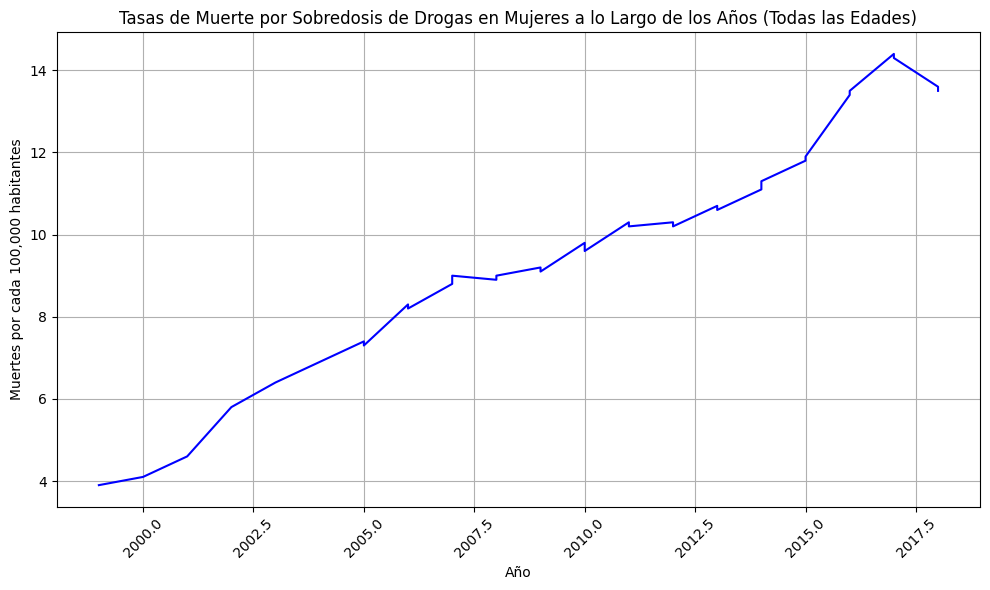

In [ ]:
# Filtrar los datos para incluir solo 'All drug overdose deaths', 'Total' y 'Female' para todas las edades
female_filtered_data = df[(df['AGE'] == 'All ages') &
                            (df['PANEL'] == 'All drug overdose deaths') &
                            (df['STUB_LABEL'] == 'Female')]

# Ordenar los datos por año en orden ascendente
female_filtered_data_sorted = female_filtered_data.sort_values(by='YEAR')

# Extraer las columnas relevantes para la visualización
female_years = female_filtered_data_sorted['YEAR']
female_death_rates = female_filtered_data_sorted['ESTIMATE']

# Generar la gráfica
plt.figure(figsize=(10, 6))
plt.plot(female_years, female_death_rates, linestyle='-', color='b')  # Quitar marker='o' para no mostrar los puntos
plt.title('Tasas de Muerte por Sobredosis de Drogas en Mujeres a lo Largo de los Años (Todas las Edades)')
plt.xlabel('Año')
plt.ylabel('Muertes por cada 100,000 habitantes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


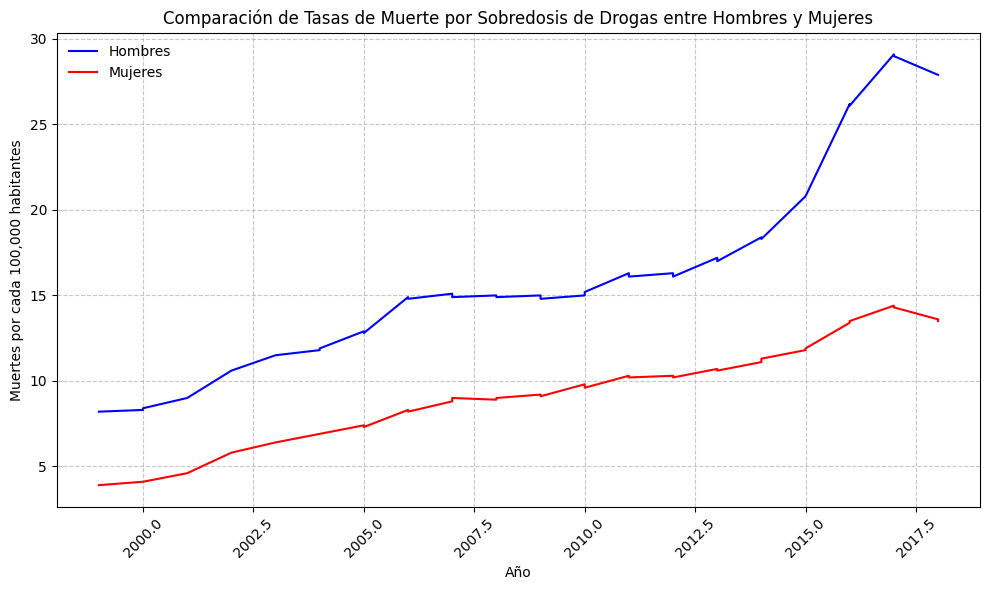

In [ ]:
# Generar la comparación con líneas para hombres y mujeres sin relieves
plt.figure(figsize=(10, 6))

# Línea para hombres
plt.plot(men_years, men_death_rates, linestyle='-', color='b', label='Hombres')

# Línea para mujeres
plt.plot(female_years, female_death_rates, linestyle='-', color='r', label='Mujeres')

plt.title('Comparación de Tasas de Muerte por Sobredosis de Drogas entre Hombres y Mujeres')
plt.xlabel('Año')
plt.ylabel('Muertes por cada 100,000 habitantes')
plt.legend(frameon=False)  # Quitar el marco de la leyenda para un aspecto más limpio
plt.grid(True, linestyle='--', alpha=0.7)  # Ajustar la apariencia de la cuadrícula
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



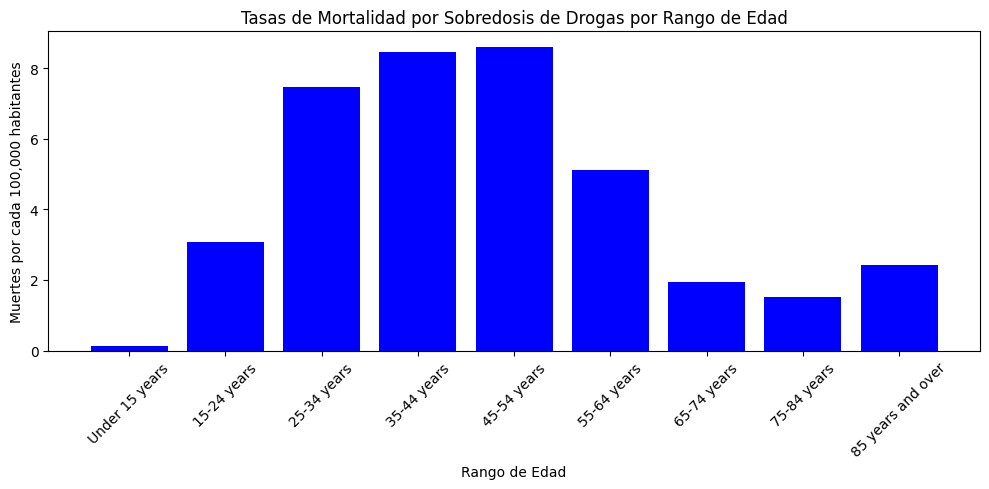

In [ ]:
# Filtrar los datos para incluir solo 'All drug overdose deaths' y todos los grupos de edad
age_filtered_data = df[(df['PANEL'] == 'All drug overdose deaths') &
                         (df['STUB_NAME'] == 'Total') &
                         (df['AGE'] != 'All ages')]

# Inspeccionar las categorías únicas en la columna 'AGE'
unique_ages_in_data = df['AGE'].unique()
unique_ages_in_data

# Ver algunas filas del conjunto de datos filtrado
age_filtered_data.head()

# Filtrar los datos para incluir solo los grupos de edad sin considerar otras condiciones
age_only_filtered_data = df[df['AGE'].isin(unique_ages_in_data) & (df['AGE'] != 'All ages')]

# Ver algunas filas del conjunto de datos filtrado
age_only_filtered_data.head() #Moficar numero para visualizar los datos

# Agrupar por edad y calcular la media de las tasas de muerte
age_grouped_data = age_only_filtered_data.groupby('AGE')['ESTIMATE'].mean().reset_index()

# Ordenar por las categorías de edad
age_order = ['Under 15 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85 years and over']
age_grouped_data['AGE'] = pd.Categorical(age_grouped_data['AGE'], categories=age_order, ordered=True)
age_grouped_data = age_grouped_data.sort_values('AGE')

# Generar la gráfica de barras para las tasas de mortalidad por rango de edad
plt.figure(figsize=(10, 5))
plt.bar(age_grouped_data['AGE'], age_grouped_data['ESTIMATE'], color='b')
plt.title('Tasas de Mortalidad por Sobredosis de Drogas por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Muertes por cada 100,000 habitantes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


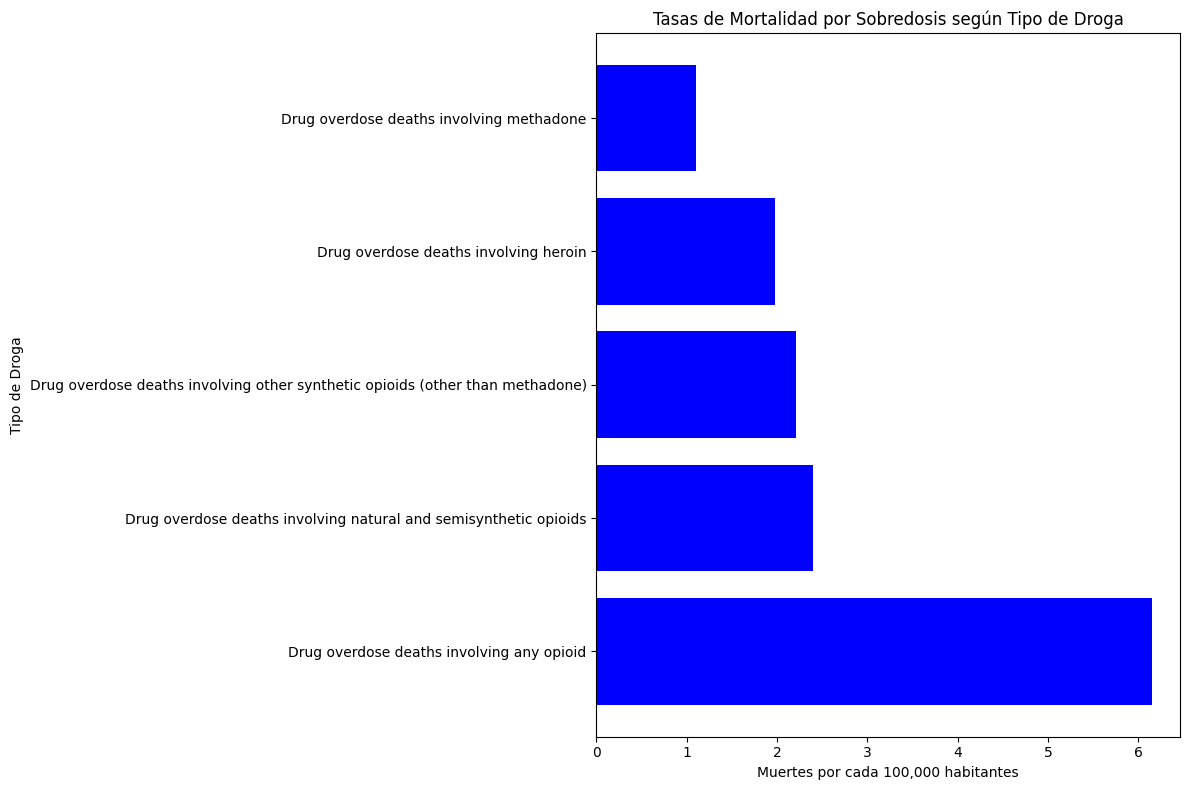

In [ ]:
# Filtrar los datos para incluir solo los tipos de drogas analizadas
drug_types_filtered_data = df[(df['PANEL'] != 'All drug overdose deaths') & (df['AGE'] == 'All ages')]

# Agrupar por tipo de droga y calcular la media de las tasas de muerte
drug_types_grouped_data = drug_types_filtered_data.groupby('PANEL')['ESTIMATE'].mean().reset_index()

# Ordenar por las tasas de muerte de forma descendente
drug_types_grouped_data = drug_types_grouped_data.sort_values(by='ESTIMATE', ascending=False)

# Generar la gráfica de barras para las tasas de mortalidad por tipo de droga
plt.figure(figsize=(12, 8))
plt.barh(drug_types_grouped_data['PANEL'], drug_types_grouped_data['ESTIMATE'], color='b')
plt.title('Tasas de Mortalidad por Sobredosis según Tipo de Droga')
plt.xlabel('Muertes por cada 100,000 habitantes')
plt.ylabel('Tipo de Droga')
plt.tight_layout()

# Mostrar la gráfica
plt.show()
